<a href="https://www.kaggle.com/code/samithsachidanandan/flight-price-prediction-in-python?scriptVersionId=267298102" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [29]:
import pandas as pd 

In [30]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")

In [31]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [33]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [34]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [35]:
df.apply(lambda x : len(x.unique()))

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [36]:
df.airline.value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [37]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [38]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

### Preprocessing 

In [39]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x:1 if x == 'Business' else 0 )

In [40]:
df.stops =pd.factorize(df.stops)[0]

In [41]:
df =df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df =df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df =df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city', axis=1)
df =df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time', axis=1)
df =df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time', axis=1)


In [42]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Training Regression Model 

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('price', axis =1), df.price

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [46]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
reg.score(X_test, y_test)

0.9854387733156809

In [49]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score 

y_pred = reg.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred) )
print("MSE",mean_squared_error (y_test, y_pred))
print("RMSE",math.sqrt(mean_squared_error (y_test, y_pred)))

R2 0.9854387733156809
MAE 1060.9942073240995
MSE 7495787.739315158
RMSE 2737.843629449125


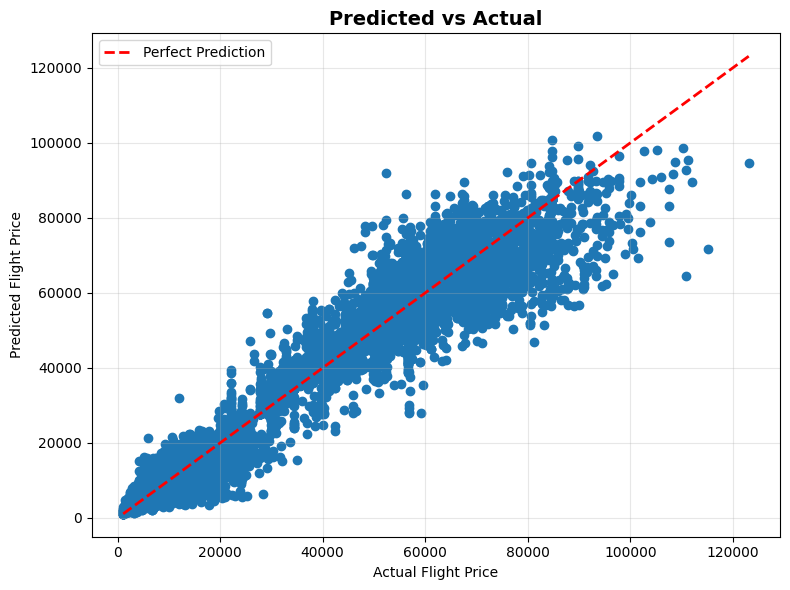

In [53]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title(f"Predicted vs Actual", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

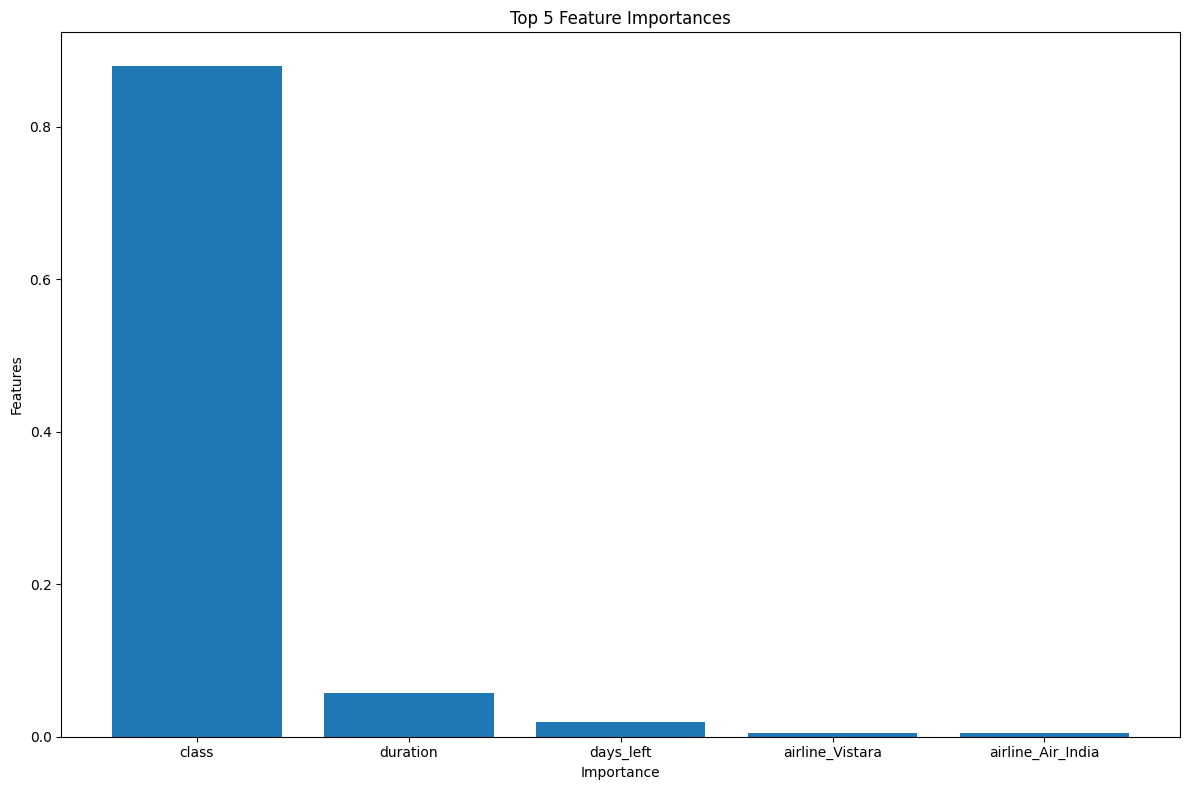

In [69]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse= True)

importance_df = pd.DataFrame(sorted_importances, columns=['feature', 'importance'])


max_features = 5
importance_df = importance_df.head(max_features)

plt.figure(figsize=(12, 8))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 5 Feature Importances')
plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs = 1)

param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : [1.0, 'sqrt']
    
}

grid_search = GridSearchCV(reg, param_grid,cv=2)
grid_search.fit(X_train, y_train)

best_params =grid_search.best_params

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt']
}

reg = RandomForestRegressor(n_jobs=1, random_state=10)
random_search = RandomizedSearchCV(
    estimator=reg, 
    param_distributions=param_dist, 
    n_iter=2, 
    cv=3,
    scoring='neg_mean_squared_error', 
    verbose=2, 
    random_state=10,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time= 4.6min
[CV] END max_depth=20, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=  34.7s


In [ ]:
best_regressor.score(X_test, y_test)